### Notebook for EDA on Solution Database

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
### TODO Add your file path ###
file_path = '../'
file_path_2 = '../Figures_ver7/'
#File that was extracted from the big database having only labelled data. Relevant = 1 means relevant.
file_name = 'aaa_solution_export 20231029.xlsx'
#file_name = 'aaa_solution_export 20230210.xlsx'
df = pd.read_excel(file_path + file_name)

We now remove some cells, splits the cells with multiple entries and change some text

In [29]:
df.drop(['Name','Email address','Contributors','Acknowledgments','Contacts of key institutional partners involved with the solution planning and implementation',
         'Is there anything you would like to add with respect to CCA in mountains?'], inplace=True, axis=1)

In [30]:
#df['Climate impact(s) addressed'].str.split(';;', expand=True)
new = df["Climate impact(s) addressed"].str.split(";;", n = -1, expand = True)
df[['ClimateImpact_' + str(i) for i in range(new.shape[1])]] = new
df = df.replace({np.nan: None})
df.drop('Climate impact(s) addressed', axis = 1, inplace=True)
del new

In [31]:
#df['Other climate impact(s) addressed'].str.split(',', expand=True)
new = df["Other climate impact(s) addressed"].str.split(";;", n = -1, expand = True)
df[['OtherClimateImpact_' + str(i) for i in range(new.shape[1])]] = new
df = df.replace({np.nan: None})
df.drop('Other climate impact(s) addressed', axis = 1, inplace=True)
del new

In [32]:
#df['Mountain range'].str.split(',', expand=True)
new = df["Mountain range"].str.split(",", n = -1, expand = True)
df[['Mountain range_' + str(i) for i in range(new.shape[1])]] = new
df = df.replace({np.nan: None})
df.drop('Mountain range', axis = 1, inplace=True)
del new

In [33]:
#df['Mountain ecosystem type(s)'].str.split(',', expand=True)
new = df["Mountain ecosystem type(s)"].str.split(";;", n = -1, expand = True)
df[['Mountain ecosystem type(s)_' + str(i) for i in range(new.shape[1])]] = new
df = df.replace({np.nan: None})
df.drop('Mountain ecosystem type(s)', axis = 1, inplace=True)
del new

In [34]:
#df['Solution type(s)'].str.split(',', expand=True)
new = df["Solution type(s)"].str.split(";;", n = -1, expand = True)
df[['Solution type(s)_' + str(i) for i in range(new.shape[1])]] = new
df = df.replace({np.nan: None})
df.drop('Solution type(s)', axis = 1, inplace=True)
del new

In [35]:
#df['Sectors'].str.split(',', expand=True)
new = df["Sectors"].str.split(";;", n = -1, expand = True)
df[['Sectors_' + str(i) for i in range(new.shape[1])]] = new
df = df.replace({np.nan: None})
df.drop('Sectors', axis = 1, inplace=True)
del new

In [36]:
#df['Co-benefits(s) associated with the solution implementation'].str.split(',', expand=True)
new = df["Co-benefits(s) associated with the solution implementation"].str.split(";;", n = -1, expand = True)
df[['Co-benefits_' + str(i) for i in range(new.shape[1])]] = new
df = df.replace({np.nan: None})
df.drop('Co-benefits(s) associated with the solution implementation', axis = 1, inplace=True)
del new

In [37]:
df.replace('Other (Specify)','Others',inplace=True)

In [38]:
df.replace('Other (specify)','Others',inplace=True)

In [39]:
df.replace('Other (Please specify)','Others',inplace=True)

In [40]:
df.replace('Other (please specify)','Others',inplace=True)

In [41]:
df.replace(to_replace='GLOF(glacial lake outburst floods)', value='GLOF',inplace=True)

In [42]:
df.replace(to_replace='Natural snow scarcity (frequency of “bad winters”)', value='Scarcity of natural snow',inplace=True)

In [43]:
df.replace(to_replace='GLOF (glacial lake outburst floods)', value='GLOF',inplace=True)

In [44]:
df.replace(to_replace='Periods with low temperatures (frost) and intense rainfall.', value='Low temperature and intense rainfall',inplace= True)

In [45]:
df.replace(to_replace='Glacial Lake Outburst Floods', value='GLOF',inplace= True)

In [46]:
df.replace(to_replace='Increasing temperature (impacts on precipitation type snowfall vs. rainfall and on snow production capabilities)', 
           value='Increasing temperature',inplace= True)

In [47]:
df.replace(to_replace='soil erosion', value='erosion',inplace=True)

In [ ]:
df.to_excel('../test.xlsx')

In [48]:
df.iloc[:, np.r_[0:1, 50:61]]=df.iloc[:, np.r_[0:1, 50:61]].applymap(lambda s: s.lower() if type(s) == str else s)

In [ ]:
fig, axes = plt.subplots(ncols = 2, nrows =2, figsize = (16,16))
data = df.loc[:, df.columns.str.startswith('ClimateImpact_')].apply(pd.Series.value_counts).sum(axis =1).sort_values(ascending=False)
data = data.to_frame(name='Number of solutions per climate impact')
data.index = data.index.str.capitalize()
x0=data[data.index != 'Others']
del data

data = df.loc[:, df.columns.str.startswith('Solution type(s)_')].apply(pd.Series.value_counts).sum(axis =1).sort_values(ascending=False)
data = data.to_frame(name='Number of solutions per solution type')
data.index = data.index.str.capitalize()
x1=data[data.index != 'Others']
del data

data = df.loc[:, df.columns.str.startswith('Mountain ecosystem type(s)_')].apply(pd.Series.value_counts).sum(axis =1).sort_values(ascending=False)
data = data.to_frame(name='Number of solutions per mountain ecosystem type')
data.index = data.index.str.capitalize()
x2=data[data.index != 'Others']
del data

data = df.loc[:, df.columns.str.startswith('Sectors_')].apply(pd.Series.value_counts).sum(axis =1).sort_values(ascending=False)
data = data.to_frame(name='Number of solutions per sector')
data.index = data.index.str.capitalize()
x3=data[data.index != 'Others']
del data

x0.plot.bar(ax=axes[0,0],color='darksalmon',  edgecolor='firebrick') 
for p in axes[0,0].containers:
    axes[0,0].bar_label(p, fmt='%d', padding=4, fontsize=14, label_type='edge')
axes[0,0].set(ylabel=None)
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=80, ha='right',fontsize = 14,rotation_mode="anchor")
axes[0,0].set_yticklabels([])
#ax.set_yticks([])
axes[0,0].grid(axis = 'y', linestyle = '--', linewidth = 0.5)
#axes[0,0].set_title(label = title, fontsize = 16, pad = 15)
axes[0,0].tick_params(bottom = False)
axes[0,0].spines["bottom"].set_visible(True)
axes[0,0].spines["top"].set_visible(False)
axes[0,0].spines["right"].set_visible(False)
axes[0,0].spines["left"].set_visible(False)
axes[0,0].set_title('Main climate impacts addressed',fontsize = 16,pad = 15)
axes[0,0].set_ylim([0, 70])
axes[0,0].legend(fontsize = 14)

x1.plot.bar(ax=axes[1,0], color = 'yellowgreen',edgecolor='olive') 
for p in axes[1,0].containers:
    axes[1,0].bar_label(p, fmt='%d', padding=4, fontsize=14, label_type='edge')
axes[1,0].set(ylabel=None)
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=80, ha='right', fontsize = 14,rotation_mode="anchor")
axes[1,0].set_yticklabels([])
#ax.set_yticks([])
axes[1,0].grid(axis = 'y', linestyle = '--', linewidth = 0.5)
#axes[1,0].set_title(label = title, fontsize = 14, pad = 15)
axes[1,0].tick_params(bottom = False)
axes[1,0].spines["bottom"].set_visible(True)
axes[1,0].spines["top"].set_visible(False)
axes[1,0].spines["right"].set_visible(False)
axes[1,0].spines["left"].set_visible(False)
axes[1,0].set_title('Solution types',fontsize = 16, pad = 15)
axes[1,0].set_ylim([0, 70])
axes[1,0].legend(fontsize = 14)

x2.plot.bar(ax=axes[0,1], color = 'blue', edgecolor='darkblue') 
for p in axes[0,1].containers:
    axes[0,1].bar_label(p, fmt='%d', padding=4, fontsize=14, label_type='edge')
axes[0,1].set(ylabel=None)
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=80, ha='right', fontsize = 14,rotation_mode="anchor")
axes[0,1].set_yticklabels([])
#ax.set_yticks([])
axes[0,1].grid(axis = 'y', linestyle = '--', linewidth = 0.5)
#axes[0,1].set_title(label = title, fontsize = 14, pad = 15)
axes[0,1].tick_params(bottom = False)
axes[0,1].spines["bottom"].set_visible(True)
axes[0,1].spines["top"].set_visible(False)
axes[0,1].spines["right"].set_visible(False)
axes[0,1].spines["left"].set_visible(False)
axes[0,1].set_title('Mountain ecosystem types',fontsize = 16, pad = 15)
axes[0,1].set_ylim([0, 70])
axes[0,1].legend(fontsize = 14)

x3.plot.bar(ax=axes[1,1],color = 'plum', edgecolor='mediumpurple') 
for p in axes[1,1].containers:
    axes[1,1].bar_label(p, fmt='%d', padding=4, fontsize=14, label_type='edge') 
axes[1,1].set(ylabel=None)
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=80, ha='right', fontsize = 14,rotation_mode="anchor")
axes[1,1].set_yticklabels([])
#ax.set_yticks([])
axes[1,1].grid(axis = 'y', linestyle = '--', linewidth = 0.5)
#axes[1,1].set_title(label = title, fontsize = 16, pad = 15)
axes[1,1].tick_params(bottom = False)
axes[1,1].spines["bottom"].set_visible(True)
axes[1,1].spines["top"].set_visible(False)
axes[1,1].spines["right"].set_visible(False)
axes[1,1].spines["left"].set_visible(False)
axes[1,1].set_title('Sectors',fontsize = 16,pad = 15)
axes[1,1].set_ylim([0, 70])
axes[1,1].legend(fontsize = 14)

fig.tight_layout()
fig.subplots_adjust(wspace=0.2, hspace = 0.7)
figure_name = "Characteristics_plots"
plt.savefig(file_path_2 + figure_name + '.png', bbox_inches='tight', dpi = 'figure')
plt.show()

In [ ]:
#Make figure showing only the main climate impacts
#This figure is not used in the last version of the manuscript
df2 = df[['ClimateImpact_0', 'ClimateImpact_1', 'ClimateImpact_2','ClimateImpact_3','ClimateImpact_4']].apply(pd.Series.value_counts)
df2=df2[df2.index != "others"]
df2.index = df2.index.str.capitalize()
title='Main climate impact addressed'
ylabel='Number of solutions per climate impact'
#ax = ((df2.sum(axis = 1)/df2.sum(axis = 1).sum())*100).sort_values(ascending=False).plot.bar(figsize = (8,6), color='darksalmon',  edgecolor='firebrick') 
#for p in ax.containers:
#    ax.bar_label(p, fmt='%.1f%%', padding=4, label_type='edge')
ax = (df2.sum(axis = 1).sort_values(ascending=False)).plot.bar(figsize = (8,6), color='darksalmon',  edgecolor='firebrick') 
for p in ax.containers:
    ax.bar_label(p, fmt='%d', padding=4, label_type='edge')
ax.set(ylabel=ylabel)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha='right', fontsize = 12,rotation_mode="anchor")
ax.set_yticklabels([])
#ax.set_yticks([])
ax.grid(axis = 'y', linestyle = '--', linewidth = 0.5)
ax.set_title(label = title, fontsize = 14, pad = 10)
ax.tick_params(bottom = False)
ax.spines["bottom"].set_visible(True)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
figure_name = 'Main_climate_impact'
plt.savefig(
    file_path_2 + figure_name + '.svg',
       bbox_inches='tight', dpi = 'figure')
plt.show()
del ax

In [ ]:
# Helper function --> useful but not used in the last version of the manuscript. 

def charactheristic(data,xx,other,figure_name,color,edgecolor,title,ylabel, figsize):
# Function to count instances across Series or columns in a pandas dataframe and calculate the percentage
# For head selection and one data series it does not work

    
    data_new = ((data.apply(pd.Series.value_counts).sum(axis =1))/(data.apply(pd.Series.value_counts).sum(axis =1)).sum())*100
    data_new = data_new.to_frame(name=xx)
    data_new=data_new[data_new.index != 'others']
    title = title
    ylabel=ylabel
    ax = data_new.sort_values(by=xx,ascending=False).plot.bar(figsize = figsize,color=color,edgecolor=edgecolor, legend =False)
    for p in ax.containers:
            ax.bar_label(p,fmt='%.1f%%', padding=4, label_type='edge')
    ax.set(ylabel=ylabel)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha='right', fontsize = 12,rotation_mode="anchor")
    ax.set_yticklabels([])
   # ax.set_title(label = title, fontsize = 12, pad = 10)
    ax.grid(axis = 'y', linestyle = '--', linewidth = 0.5)
    ax.set_title(label = title, fontsize = 14, pad = 10)
    ax.tick_params(bottom = False)
    ax.spines["bottom"].set_visible(True)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    figure_name = figure_name
    plt.savefig(
    file_path_2 + figure_name + '.svg',
       bbox_inches='tight', dpi = 400)
    plt.show()
    del ax

In [ ]:
#Figure with the solution types
#charactheristic_only_Counts(df.loc[:, df.columns.str.startswith('ClimateImpact_')], xx = 'Frequency', other = 'Others',figure_name = 'Solution_types2', 
#                color = 'yellowgreen',edgecolor='olive', title = 'Solution types', 
#                ylabel='Proportion of solution types', figsize = (8,6))

In [ ]:
#Figure with the solution types
#charactheristic(df.iloc[:,75:81], xx = 'Frequency', other = 'Others',figure_name = 'Solution_types2', 
#                color = 'yellowgreen',edgecolor='olive', title = 'Solution types', 
#                ylabel='Proportion of solution types', figsize = (8,6))

In [ ]:
#Figure with the ecosystem types
#charactheristic(df.iloc[:,67:74], xx = 'Frequency',other = 'Others',figure_name = 'EcosystemType_2', 
#                color = 'blue', edgecolor='darkblue',title = 'Ecosystem types',
#                ylabel='Proportion of ecosystem types',figsize = (8,6))

In [ ]:
#Figure with the sectors
#charactheristic(df.iloc[:,82:91], xx = 'Frequency',other = 'Others',figure_name = 'Sectors_2', 
#                color = 'plum', edgecolor='mediumpurple',title = 'Solutions per sector',
#                ylabel='Proportion of solutions per sector', figsize = (8,6))

In [ ]:
###Barchart with all impacts (including secondary impacts)
#df6 = ((df.iloc[:,50:61].apply(pd.Series.value_counts).sum(axis =1))/(df.iloc[:,50:61].
#                                                apply(pd.Series.value_counts).sum(axis =1)).sum())*100

#data = df.loc[:, df.columns.str.startswith('Mountain ecosystem type(s)_')]

df6 = df.iloc[:,50:61].apply(pd.Series.value_counts).sum(axis =1)

df6 = df6.to_frame(name='Number of solutions per climate impact')
title='Climate impact addressed (including secondary impacts)'
ylabel='Solution couunt'
ax = df6[df6.index != 'others'].sort_values(by='Number of solutions per climate impact', ascending=False).head(20).plot.bar(figsize = (15,8),color='darksalmon',edgecolor='firebrick', legend =False)
for p in ax.containers:
    ax.bar_label(p, fmt='%.1f%%', padding=8, label_type='edge', fontsize = 10)
ax.set(ylabel=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha='right', fontsize = 10, rotation_mode="anchor")
ax.set_yticklabels([])
ax.grid(axis = 'y', linestyle = '--', linewidth = 0.5)
ax.set_title(label = title, fontsize = 12, pad = 10)
ax.tick_params(bottom = False)
ax.spines["bottom"].set_visible(True)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
figure_name = 'SecondaryImpacts'
plt.savefig(
    file_path_2 + figure_name + '.svg',
       bbox_inches='tight', dpi = 400)
plt.show()

### Benefits and co-benefits

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 97 columns):
 #   Column                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                            --------------  -----  
 0   Title                                                                                                                             88 non-null     object 
 1   Body                                                                                                                              88 non-null     object 
 2   Solution location                                                                                                                 88 non-null     object 
 3   Was the solution implemented in more than one country?                                           

In [50]:
#Check which column's name contain the SUB-string 'BENEFIT'

benefit_cols = [col for col in df.columns if 'benefit' in col]
print(benefit_cols)

['Main benefit associated with the solution implementation', 'Other benefit(s) associated with the solution implementation', 'Other co-benefits(s) associated with the solution implementation', 'Co-benefits_0', 'Co-benefits_1', 'Co-benefits_2', 'Co-benefits_3', 'Co-benefits_4']


In [51]:
#MAKE SURE YOU RESET THE INDEX TO TITLE SO TO RETAIN THE UNIQUE IDENTIFIER FOR THE SOLUTION IN THE DATAFRAME WHERE YOU ONLY
#SELECT BENEFIT RELATED COLUMNS
df_new = df.set_index('Title')

In [52]:
df_new = df_new.filter(regex='benefit')

In [53]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, sustainable watershed management in glacial mountain ecosystems in peru to integrated water resource management: water for virunga project
Data columns (total 8 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   Main benefit associated with the solution implementation          88 non-null     object
 1   Other benefit(s) associated with the solution implementation      4 non-null      object
 2   Other co-benefits(s) associated with the solution implementation  5 non-null      object
 3   Co-benefits_0                                                     88 non-null     object
 4   Co-benefits_1                                                     80 non-null     object
 5   Co-benefits_2                                                     67 non-null     object
 6   Co-benefits_3  

In [ ]:
#df_new=df.iloc[:, np.r_[0:3, 50:96,15]] #.applymap(lambda s: s.lower() if type(s) == str else s).info()

In [54]:
df_new.rename(columns = {'Main benefit associated with the solution implementation':'Main benefit'}, inplace=True)

In [58]:
df_new[['Main benefit','Co-benefits_0','Co-benefits_1','Co-benefits_2','Co-benefits_3','Co-benefits_4']].apply(pd.Series.value_counts)

,Main benefit,Co-benefits_0,Co-benefits_1,Co-benefits_2,Co-benefits_3,Co-benefits_4
Climate risk reduction,32.0,49.0,NaN,NaN,NaN,NaN
Economic benefits,6.0,2.0,18.0,25.0,10.0,NaN
Environmental benefits,33.0,3.0,8.0,22.0,15.0,1.0
Other,3.0,NaN,NaN,NaN,NaN,NaN
Others,NaN,1.0,NaN,NaN,2.0,2.0
Political benefits,NaN,NaN,NaN,3.0,8.0,6.0
Social benefits,13.0,31.0,35.0,NaN,NaN,NaN
Technical benefits,1.0,2.0,19.0,17.0,NaN,NaN


In [ ]:
df_new['Main benefit']

In [59]:
new = df_new[['Main benefit','Co-benefits_0','Co-benefits_1','Co-benefits_2','Co-benefits_3', 'Co-benefits_4']]
new.rename(columns={'Co-benefits_0':'Co-benefits_1', 'Co-benefits_1':'Co-benefits_2', 'Co-benefits_2':'Co-benefits_3','Co-benefits_3':'Co-benefits_4', 'Co-benefits_4':'Co-benefits_5'}, inplace = True)
categorical_cols = ['Main benefit','Co-benefits_1','Co-benefits_2','Co-benefits_3','Co-benefits_4','Co-benefits_5']
benefits = pd.get_dummies(new, columns=categorical_cols)
del new
#print(new.iloc[:,0].unique())
#new[new['Main benefit'] == 'Climate risk reduction'].iloc[:,1:].apply(pd.Series.value_counts).sum(axis =1).plot.bar()

/var/folders/hd/n13870fj1mv_x9bv1cytjvk80000gn/T/ipykernel_36146/2470333595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new.rename(columns={'Co-benefits_0':'Co-benefits_1', 'Co-benefits_1':'Co-benefits_2', 'Co-benefits_2':'Co-benefits_3','Co-benefits_3':'Co-benefits_4', 'Co-benefits_4':'Co-benefits_5'}, inplace = True)


In [ ]:
df6 = ((df.iloc[:,75:81].apply(pd.Series.value_counts).sum(axis =1))/(df.iloc[:,75:81].apply(pd.Series.value_counts).sum(axis =1)).sum())*100

In [61]:
benefits.reset_index(inplace=True)

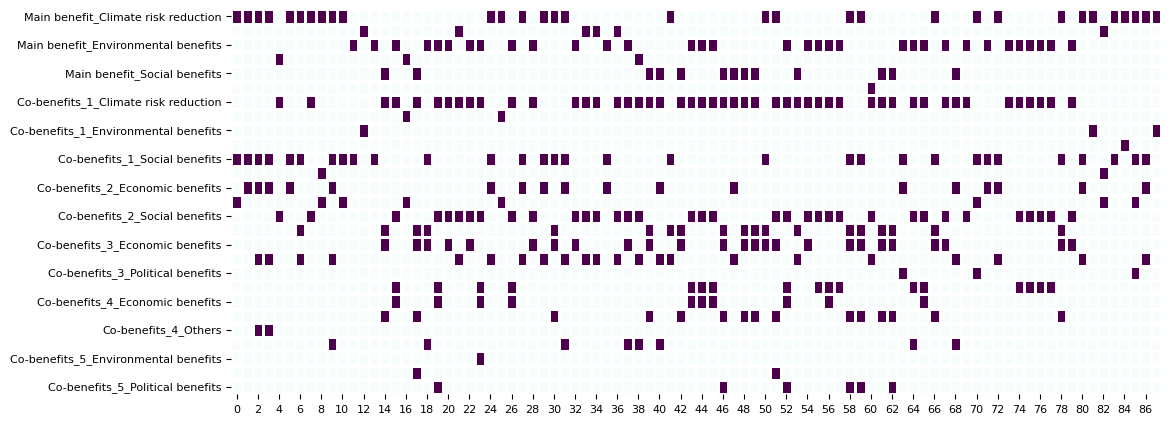

In [63]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.heatmap(benefits.iloc[:,1:].T, ax=ax, linecolor='white',linewidths=2,cmap="BuPu", cbar = False)
ax.tick_params(labelsize=8)
figure_name = 'Benefits and co-benefits'
plt.savefig(
    file_path_2 + figure_name + '.png',
       bbox_inches='tight', dpi = 400)
plt.show()

In [ ]:
print("Do you want to save:")
x = input()
if x == 'yes':
    df_new.to_excel('/Users/vmuccion/Documents/Projects/AdaptAtAltitutde/df_new_1.xlsx',index = False, header=True)
else:
    print('No need to save because answer was: ' + x)

In [64]:
df7 = df_new[['Main benefit','Co-benefits_0','Co-benefits_1','Co-benefits_2','Co-benefits_3','Co-benefits_4']].apply(pd.Series.value_counts)

In [65]:
df7 = df7.drop(['Other', 'Others'])

In [77]:
df7.rename(index={'Technical benefits':'Technology benefits', 'Climate risk reduction': 'Climate risk reduction benefits'}, inplace = True)

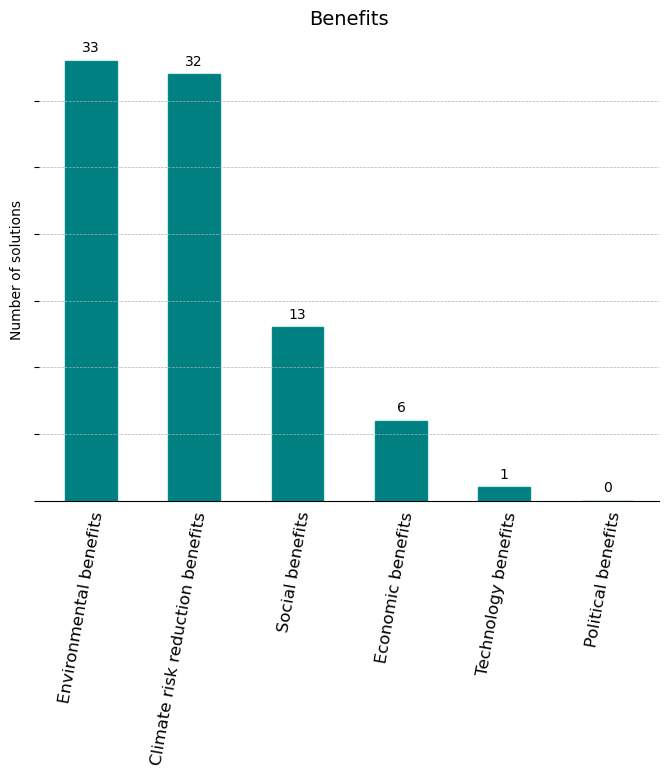

In [78]:
#Make figure showing only the main benefits
title='Benefits'
ylabel='Number of solutions'
#ax = ((df7['Main benefit'].fillna(0)/df7['Main benefit'].sum())*100).sort_values(ascending=False).plot.bar(figsize = (8,6), color='teal',  edgecolor='darkcyan') 
ax = (df7['Main benefit'].fillna(0)).sort_values(ascending=False).plot.bar(figsize = (8,6), color='teal',  edgecolor='darkcyan') 
for p in ax.containers:
    ax.bar_label(p, fmt='%d', padding=4, label_type='edge')
ax.set(ylabel=ylabel)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha='right', fontsize = 12,rotation_mode="anchor")
ax.set_yticklabels([])
#ax.set_yticks([])
ax.grid(axis = 'y', linestyle = '--', linewidth = 0.5)
ax.set_title(label = title, fontsize = 14, pad = 10)
ax.tick_params(bottom = False)
ax.spines["bottom"].set_visible(True)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
figure_name = 'Main_benefits'
plt.savefig(
    file_path_2 + figure_name + '.png',
       bbox_inches='tight', dpi = 400)
plt.show()
del ax

In [ ]:
df.head()

In [ ]:
df.rename(columns={'When implementation started (year)': 'Year started', 'When implementation ended or the project leading to the solution is due to close (year)': 'Year end'}, inplace=True)

In [ ]:
df10 = df[df['Year started'] >0]
subgrade_order = sorted(df10['Year started'].unique())
x1 = df10['Year started']
chart = sns.countplot(x=x1,data=df,order = subgrade_order, palette = 'crest')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_title('Number of solutions starting in given year')
del df10
None

In [ ]:
df10 = df[df['Year end'] >0]
subgrade_order = sorted(df10['Year end'].unique())
x1 = df10['Year end'] 
chart = sns.countplot(x=x1,data=df,order = subgrade_order, palette = 'crest')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_title('Number of solutions ending in given year')
del df10
None

In [ ]:
df['Duration'] = df['Year end'] - df['Year started']

In [ ]:
df10 = df[(df['Duration'] > 0) & (df['Duration'] <40)]
subgrade_order = sorted(df10['Duration'].unique())
x1 = df10['Duration']
chart = sns.histplot(x=x1,data=df, bins= 5, color = 'green')
#chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_title('Duration in years')
del df10
None